In [ ]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from bliss.encoders.detection import DetectionEncoder
from bliss.encoders.layers import ConcatBackgroundTransform

device = torch.device("cuda:0")

input_transform = ConcatBackgroundTransform()

detection = DetectionEncoder(input_transform).to(device).eval()
detection.load_state_dict(torch.load("../models/detection.pt", map_location=device))
detection.requires_grad_(False)


DetectionEncoder(
  (_enc_conv): EncoderCNN(
    (layer): Sequential(
      (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): ConvBlock(
        (conv1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop1): Dropout2d(p=0, inplace=False)
        (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (4): ConvBlock(
        (conv1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop1): Dropout2d(p=0, inplace=False)
        (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1),

In [ ]:
d = torch.load("../data/toy_separation.pt")
d.keys()

dict_keys(['images', 'recon', 'resid', 'seps', 'truth', 'est', 'tile_est'])

In [ ]:
images = d['images']
recon = d['recon']

In [ ]:
d.keys()

dict_keys(['images', 'recon', 'resid', 'seps', 'truth', 'est', 'tile_est'])

In [ ]:
images.shape, recon.shape

(torch.Size([180, 1, 92, 92]), torch.Size([180, 1, 92, 92]))

In [ ]:
from bliss.datasets.lsst import get_default_lsst_background
sky_level = get_default_lsst_background()
tile_est = detection.variational_mode(images.to(device), torch.full_like(images, sky_level).to(device)).to(torch.device("cpu"))

KeyError: 'prob_n_sources'

In [ ]:
est = tile_est.to_full_params()

In [ ]:
est.plocs

tensor([], size=(180, 0, 2))

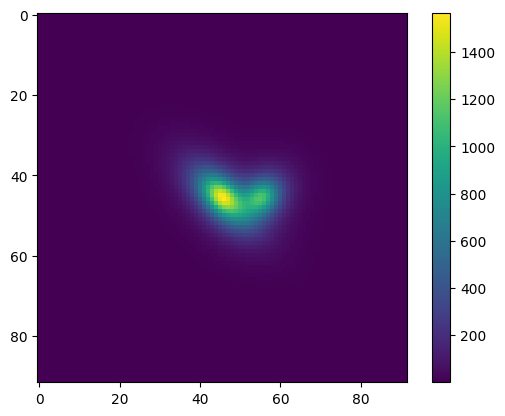

In [ ]:
plt.imshow(images[100,0])
plt.colorbar()

In [ ]:
d['est']['ploc'][100]

tensor([[20., 20.],
        [20., 28.]])

In [ ]:
d['truth']['ploc'][100]

tensor([[22., 22.],
        [22., 32.]])

In [ ]:
d['est']['ploc_sd'][0]

tensor([[0., 0.],
        [nan, nan]])